# Exploration of Region Based CNN's 
## Verschil tussen RCNN, fastRCNN en faster RCNN

RCNN is het uitvoeren van CNN per mask op een afbeelding. Het voordeel hiervan: Locatie gericht classificeren en locatie invariante object herkenning. Wanneer een object altijd op dezelfde plek van de afbeelding zit, dan kan een CNN gebruikt worden. Dit komt omdat de filters die gebruikt worden zich gaan aanpassen aan de vormen op een locatie, maar als het object niet op dezelfde locatie in de afbeelding zit, kunnen de filters zich hier ook niet op aanpassen. RCNN voorkomt dit, maar heeft een groot nadeel. Het is echt heel langzaam. Echt heel langzaam. Forward propagation kan al 90s duren [Kortus 2019]. Dit is aangepakt in andere algoritmes genaamd fast en faster RCNN. Deze zijn sneller (Duh). 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize
%matplotlib inline

import torch
from torch.utils.data import DataLoader, Dataset
import torchvision
from torchvision import transforms

In [3]:
I = plt.imread("data/0/C1_thinF_IMG_20150604_104722_cell_115.png")
I[:, :, 0].shape

(115, 133)

In [174]:
class DatasetMalaria(Dataset):
    def __init__(self, filepath, transform = None):
        self.data = pd.read_csv(filepath, sep = ";")
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        imageName = self.data.iloc[index, 0]
        label = self.data.iloc[index, 1]
        image = plt.imread("data/{}/{}".format(label, imageName))
        image = resize(image, [50, 50, 3], anti_aliasing = True)
        
        imageShape = image.shape
        image = image.reshape((imageShape[2], imageShape[0], imageShape[1]))
        
        if self.transform is not None:
            image = self.transform(image)
            image = np.transpose(image,(1,0,2))
            
        return image, label

In [197]:
train = DatasetMalaria("list_of_imagenames_with_label.csv")

In [198]:
image.reshape((1, 3, 50, 50)).shape

(1, 3, 50, 50)

In [199]:
transform = torchvision.transforms.ToTensor()
transform(image).shape

torch.Size([50, 3, 50])

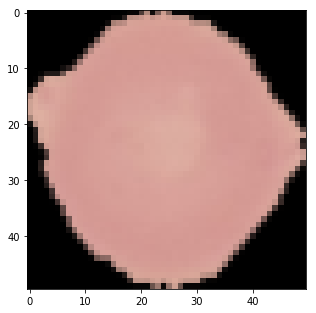

In [200]:
image, label = train[0]
plt.imshow(image.reshape((50, 50, 3)))

In [201]:
train_loader = DataLoader(train, batch_size = 8, shuffle = True)

In [202]:
train_iter = iter(train_loader)
print(type(train_iter))

<class 'torch.utils.data.dataloader._DataLoaderIter'>


In [203]:
images, labels = next(train_iter)
print("images shape on batch size = {}".format(images.size()))
print("labels shape on batch size = {}".format(labels.size()))

images shape on batch size = torch.Size([8, 3, 50, 50])
labels shape on batch size = torch.Size([8])


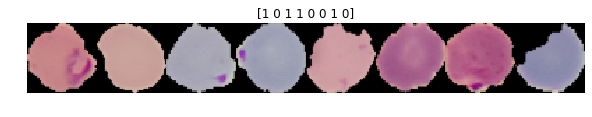

In [204]:
grid = makeGrid(images)

fig = plt.figure(figsize = (10, 160))
plt.imshow(grid)
plt.axis("off")
plt.title(labels.numpy())
plt.show()

In [205]:
train2 = DatasetMalaria("list_of_imagenames_with_label.csv", transform = torchvision.transforms.ToTensor())

In [206]:
img, lab = train2[0]
print("image shape at the first row: {}".format(img.size()))

image shape at the first row: torch.Size([3, 50, 50])


In [ ]:
#TODO: Zoek uit waarom de afbeeldingen anders is wanneer er gebruik gemaakt wordt van de transformation ToTensor()

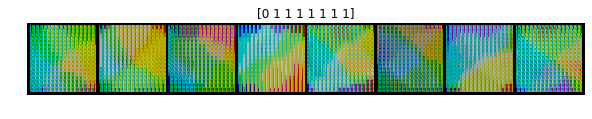

In [207]:
train_loader2 = DataLoader(train2, batch_size = 8, shuffle = True)

train_iter2  = iter(train_loader2)
images2, labels2 = next(train_iter2)

grid2 = torchvision.utils.make_grid(images2)
fig = plt.figure(figsize = (10, 160))
plt.imshow(grid2.numpy().transpose((1, 2, 0)))
plt.axis("off")
plt.title(labels2.numpy())
plt.show()

In [193]:
im2 = images2[0]
im2.shape

torch.Size([3, 50, 50])

In [194]:
def makeGrid(images):
    # images shape should be [Batch, Channel, Height, Width]
    imshape = images.shape
    b = imshape[0]
    c = imshape[1]
    h = imshape[2]
    w = imshape[3]
    grid = np.zeros((h, w*b, c))
    
    for i, img in enumerate(images):
        # image region is entire height and the i-th image * width untill (i + 1) * width
        begin = i*w
        end = (i+1)*w
        grid[:h, begin:end, :] = img.reshape(h, w, c) # reshape image in imshow format (h, w, c)
        
    return grid

In [195]:
grid2.shape

torch.Size([3, 54, 418])

In [196]:
images2.shape

torch.Size([8, 3, 50, 50])